# 95-865 Fall 2020 Quiz 1

You must fill in your name and your Andrew ID for this quiz to be graded. Moreover, filling out your name and Andrew ID below will serve as your agreement with us, the course staff, that you did not collaborate with anyone on this exam and that what you submit is truly your own individual work and not that of anyone else. Violations found will result in severe penalties.

**Your name:** REPLACE THIS WITH YOUR NAME

**Your Andrew ID:** REPLACE THIS WITH YOUR ANDREW ID

## Q1. Investigating Hospital Room Usage [40 points]

**This problem is mostly conceptual. The last part has a short coding component.**

Steel City Hospital is trying to understand how their patients use rooms in their main hospital building. They have grouped different kinds of appointments into three appointment types. Consider the following co-occurrence table that counts minutes spent in different hospital rooms by patients with different appointment types. Steel City Hospital collected this table using data for patients who made appointments within the most recent 3 months.


| &nbsp; | Hospital Room 1 | Hospital Room 2 | Hospital Room 3 | Hospital Room 4 | Hospital Room 5 |
| ------ | ------------- |-|-|-|-|
| Appointment Type 1 | 0 | 320 | 0 | 0 | 80 |
| Appointment Type 2 | 0 | 240 | 120 | 0 | 240 |
| Appointment Type 3 | 90 | 0 | 0 | 1620 | 90 |




**(a) [5 points]** How many pairs of appointment type/hospital room have a PMI value of negative infinity?

Number of pairs with negative infinity PMI value:

**Your answer:** 7

Briefly justify how you got your answer:

**Your answer:** There are 7 zeros in the co-occurrence table. These are precisely the entries that will have negative infinity PMI since we have log(0).

**(b) [15 points]** Let's focus on appointment type 2. Rank the PMIs of appointment type 2 with each of the hospital rooms from largest to smallest (only for rooms 2, 3, 4, and 5).

Specifically, we are asking you to rank the PMI's of the pairs:

- appointment type 2, hospital room 2
- appointment type 2, hospital room 3
- appointment type 2, hospital room 4
- appointment type 2, hospital room 5

For example, if you think the ranking of PMI's from largest to smallest is room 5, 4, 3, and 2, then you should write "5, 4, 3, 2".

Write the ranking of PMI's in decreasing order here:

**Your answer:** 3, 5, 2, 4

Briefly justify how you got the ranking you specified:

**Your answer:** 
Since we're focused on appointment type 2, just like in HW1 with the OPEC example, there is some calculation that we don't need to do.

First off, we don't need to worry about log since it doesn't affect the ranking. Next, we don't
need to worry about dividing by the probability of appointment type 2 since all 4 pairs we're looking at are for appointment type 2. Thus, it suffices to rank based on:

score(A,B) = (# co-occurrences of A, B) / (# co-occurrences of B with anything),
where A = appointment type 2, and B = hospital room 2, 3, 4, or 5.

Let's compute the score function for each of the following pairs.
- appointment type 2, hospital room 2: 240/(320+240) = 240/560 = 0.4285...
- appointment type 2, hospital room 3: 120/120 = 1
- appointment type 2, hospital room 4: 0/1620 = 0
- appointment type 2, hospital room 5: 240/(80+240+90) = 240/410 = 0.5853...

By ranking these from largest to smallest, we get 3, 5, 2, 4.

---

It turns out that we have some more information about how the hospital rooms are used. Specifically, each patient's appointment can involve multiple events (for example, a patient shows up and then has a first event corresponding to waiting, and then can have a second event corresponding to getting a medical exam or getting an X-ray). Here is a co-occurrence table for how many minutes are spent for different events in different rooms.

| &nbsp; | Hospital Room 1 | Hospital Room 2 | Hospital Room 3 | Hospital Room 4 | Hospital Room 5 |
| ------ | ------------- |-|-|-|-|
| Event: Waiting | 0 | 0 | 0 | 0 | 410 |
| Event: Exam | 0 | 560 | 0 | 0 | 0 |
| Event: Blood draw | 90 | 0 | 0 | 0 | 0 |
| Event: X-ray | 0 | 0 | 120 | 0 | 0 |
| Event: Infusion | 0 | 0 | 0 | 1620 | 0 |

For example, 90 minutes are spent by all patients getting blood drawn from room 1.

**(c) [5 points]** What is Cramer's V for _event vs hospital room_?

**Your answer:** 1

Briefly justify how you got the Cramer's V value you specified:

**Your answer:** The co-occurrence table shows a deterministic relationship between how events and hospital rooms co-occur. This is precisely when the Cramer's V value is as large as possible, which
is 1.

**(d) [5 points]** Given the co-occurrence tables we have already provided (_appointment type vs room_, and separately _event vs room_), is it possible to construct the co-occurrence table for _appointment type vs event_ (there would be three rows for appointment types 1, 2, and 3, and five columns for the different events)?

Say yes or no, and briefly justify your answer:

**Your answer:** Yes. There is a deterministic relationship where each of the rooms is used for a specific event. The co-occurrence table for appointment type vs event would just be the same as the co-occurrence table for appointment type vs room except where the room is replaced by whichever event the room is used for.

---

We also have a co-occurrence table for events and the number of months in advance that an appointment was made, where once again each count in the table corresponds to minutes.


| &nbsp; | 1 month in advance | 2 months in advance | 3 months in advance |
| ------ | ------------- |-|-|
| Event: Waiting | 137 | 138 | 135 |
| Event: Exam | 185 | 189 | 186 |
| Event: Blood draw | 33 | 30 | 27 |
| Event: X-ray | 45 | 36 | 39 |
| Event: Infusion | 530 | 543 | 547 |



**(e) [10 points]** Compute Cramer's V for _event vs months in advance an appointment was made_. Complete this in the code cell below. We have provided some starter code for you:

In [154]:
import numpy as np
co_table = np.array([[137, 138, 135],
                     [185, 189, 186],
                     [33, 30, 27],
                     [45, 36, 39],
                     [530, 543, 547]])

In [155]:
# Answer code
jpt = co_table / co_table.sum()
jpt_indep = np.outer(jpt.sum(axis=1), jpt.sum(axis=0))
cramers_V = np.sqrt(((jpt - jpt_indep)**2 / jpt_indep).sum() / (min(co_table.shape)-1))
print(cramers_V)

0.018924483850008694


What is the final Cramer's V value for _event vs months in advance an appointment was made_ ? (Copy and paste this numerical value from your executed code above)

**Your answer:** 0.018924483850008694

Do you think _event vs months in advance an appointment was made_ is an interesting relationship to explore for the data? Very briefly explain why or why not.

**Your answer:** No. It's very unlikely that this relationship is interesting to look at since the Cramer's V value is very close to 0.

## Q2. What Are People Singing About? [60 points]

**Before starting this problem, please be sure to download the dataset: http://www.andrew.cmu.edu/user/georgech/95-865/mystery_data_8EB52w.zip**

In this problem, we're going to look at a music dataset to understand what artists are singing about across many songs. There are many ways one can go about doing this analysis. We will try something simple: we'll just focus on song titles, while keeping track of who the artists are for the different songs. We use a preprocessed version of the Billboard 1964-2015 Top 100 Lyrics dataset. Specifically, the following code cell loads in the following Python variables:

- `song_titles`: a 1D numpy array of strings, each string corresponding to a song title
- `song_artists`: a 1D numpy array of strings, each string corresponding to a song artist; the i-th artist corresponds to the i-th song in `song_titles`
- `vocabulary`: a 1D numpy array of strings, each string corresponding to a vocabulary word
- `song_title_feature_vectors`: a 2D array/table, where rows index different songs and columns index features; the i-th row corresponds to the i-th entry in `song_titles`, and the j-th column corresponds to the j-th entry in `vocabulary` -- note that the feature vectors are precisely the histograms of words in `vocabulary` for each song (raw counts of each word appearing; not fractional frequencies)

Be sure to run this next cell before doing the rest of the problem. **Important:** The exam is written so that all the packages that need to be imported are already imported in the next cell.

In [2]:
# DO NOT MODIFY THIS CELL -- ** BE SURE TO RUN THIS CELL **
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('seaborn')

with open('mystery_titles.txt', 'r') as f:
    song_titles = [line.strip() for line in f.readlines()]
with open('mystery_artists.txt', 'r') as f:
    song_artists = [line.strip() for line in f.readlines()]
with open('mystery_features.txt', 'r') as f:
    vocabulary = [line.strip() for line in f.readlines()]

song_titles = np.asarray(song_titles)
song_artists = np.asarray(song_artists)
vocabulary = np.asarray(vocabulary)

song_title_feature_vectors = np.loadtxt('mystery_feature_vectors.txt')

print(song_titles.shape)
print(song_artists.shape)
print(vocabulary.shape)
print(song_title_feature_vectors.shape)

(2220,)
(2220,)
(65,)
(2220, 65)


Note that `song_titles.shape[0]` is equal to `song_artists.shape[0]` and also to `song_title_feature_vectors.shape[0]` (namely 2220 songs). Meanwhile, `vocabulary.shape[0]` is equal to `song_title_feature_vectors.shape[1]` (namely 65 words).

To help you understand the variables a little bit, consider the 165th song title:

In [118]:
song_titles[165]

'sweet sweet baby since youve been gone'

By running the code above, you should get the song title `'sweet sweet baby since youve been gone'`.

To get the artist for the 165th song, you can use the code:

In [4]:
song_artists[165]

'aretha franklin'

The song artist in this case is `'aretha franklin'`.

The song feature vector is:

In [5]:
song_title_feature_vectors[165]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

By running the above cell, the output you get should be `array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])`.

Note that nearly all the words in the vocabulary appear 0 times, but there are two words that appear once each, and one word that appears twice. We can easily figure out what these words are using code such as what is in the snippet below:

In [120]:
for word_idx in range(vocabulary.shape[0]):
    if song_title_feature_vectors[165, word_idx] > 0:
        print(word_idx, vocabulary[word_idx],
              song_title_feature_vectors[165, word_idx])

3 baby 1.0
19 gone 1.0
53 sweet 2.0


By running the above, the output you should get is:

```
3 baby 1.0
19 gone 1.0
53 sweet 2.0
```

This means that word index 3 corresponds to "baby", which appears once; word index 19 corresponds to "gone", which apppears once; lastly word index 53 corresponds to "sweet", which appears twice. Indeed, the title is "sweet sweet baby since youve been gone" (note that some of these words are excluded from the vocabulary and therefore ignored, namely "since", "youve", and "been").

**(a) [15 points total across subparts]** This is a warm-up problem, just to make sure you familiarize yourself with the data, and as a bit of basic Python coding review. **Extremely important: throughout this coding problem, you will not actually have to use `song_titles` and you can directly work with `song_title_feature_vectors` instead. We provide `song_titles` just in case you want to check it but you should not have to write any code that actually uses `song_titles`.**

**Subpart i. [5 points]** How many songs have exactly one word in `vocabulary` show up exactly once (in other words, how many songs are there such that the song's feature vector has a sum of 1)? **Your Python code for this subpart should print out the answer to this question.**

In [7]:
print(np.sum(song_title_feature_vectors.sum(axis=1)==1))

1618


**Subpart ii. [5 points]** What word in `vocabulary` has the largest total raw count summed across songs? **Your Python code for this subpart should print out the answer to this question.**

In [8]:
print(vocabulary[np.argmax(song_title_feature_vectors.sum(axis=0))])

love


**Subpart iii. [5 points]** How many songs have at least two distinct words in `vocabulary` show up? **Your Python code for this subpart should print out the answer to this question.**

In [17]:
print(np.sum((song_title_feature_vectors >=1).sum(axis=1) >=2))

572


**(b) [10 points]** One way to try to figure out what songs are about is to look at the "term frequencies" across all songs (the "collection term frequencies", as we saw in lecture). Plot a histogram of the top 10 most frequently occurring words (among those in `vocabulary`) according (raw counts summed across songs). The y-axis of your histogram should be the total raw count (summed across songs), and not a fractional frequency. Of course, the most frequently occurring word should be the same as what you got in part **(a)** subpart **ii**. **Your Python code for this subpart should plot a matplotlib histogram/bar chart.**

Text(0, 0.5, 'Total raw count')

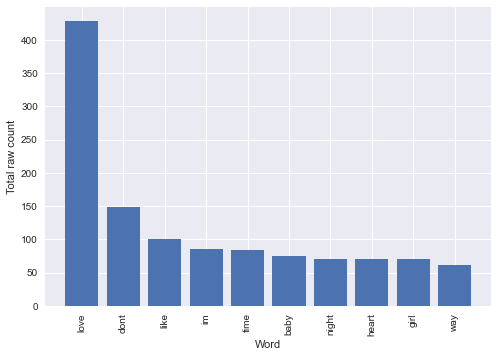

In [137]:
word_counts = song_title_feature_vectors.sum(axis=0) 
ranking = np.argsort(-word_counts) 
plt.bar(range(10), word_counts[ranking[:10]]) 
plt.xticks(range(10), vocabulary[ranking[:10]], rotation=90) 
plt.xlabel('Word') 
plt.ylabel('Total raw count')

---

While collection term frequencies provide a summary of the whole dataset, they do not tell us about whether there are, for instance, songs that are similar. We explore this direction next.

**(c) [15 points total across subparts]** To try to understand how the different songs relate, we first try PCA.

**Subpart i. [5 points]** Compute the 2D PCA representation of `song_title_feature_vectors`, *without* doing any sort of normalization/standardization (i.e., directly fit a PCA model to `song_title_feature_vectors`). Plot this 2D PCA representation. What is the total fraction of variance explained? **Your Python code for this subpart should produce a scatter plot and also print out the total fraction of variance explained.**

Total fraction explained variance: 0.17627664538626744


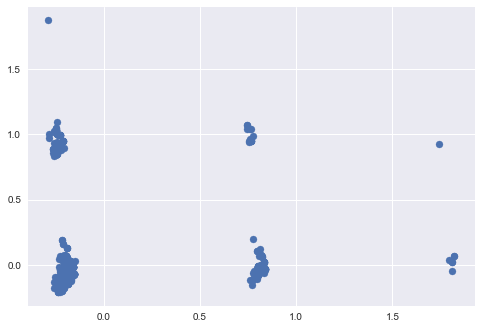

In [19]:
two_dimensional_pca = PCA(n_components=2, random_state=0) 
song_title_feature_vectors_2d_pca = two_dimensional_pca.fit_transform(song_title_feature_vectors) 
plt.scatter(song_title_feature_vectors_2d_pca[:,0], song_title_feature_vectors_2d_pca[:,1]) 
print('Total fraction explained variance:', two_dimensional_pca.explained_variance_ratio_.sum())

**Subpart ii. [5 points]** Instead of what is done in subpart i, now first normalize `song_title_feature_vectors` using `StandardScaler` and then using the standardized representation of the feature vectors, compute and plot the resulting 2D PCA representation. What is the amount of variance explained? **Your Python code for this subpart should produce a scatter plot and also print out the total fraction of variance explained.**

Total fraction explained variance: 0.03985593049252044


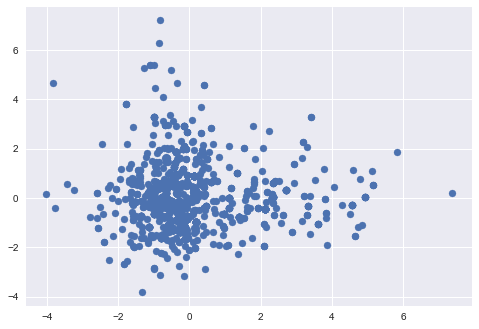

In [21]:
two_dimensional_pca = PCA(n_components=2, random_state=0) 

song_title_feature_vectors_2d_pca = two_dimensional_pca.\
fit_transform(StandardScaler().fit_transform(song_title_feature_vectors)) 

plt.scatter(song_title_feature_vectors_2d_pca[:,0], song_title_feature_vectors_2d_pca[:,1]) 
 
print('Total fraction explained variance:', 
      two_dimensional_pca.explained_variance_ratio_.sum())

**Subpart iii. [5 points]** Of the two 2D PCA representations (the one from subpart **i** and the one from subpart **ii**), which one do you think is a better representation of the song feature vectors? Please briefly justify your answer.

**Your answer (do not write code for this subpart)**: The one without standardization is better as the amount of variance explained is higher and also from the plot in subpart i, it seems like there are clusters forming thatmight be interpretable. The PCA representation in subpart ii not only has very low explained variance, it also has a plot that just looks like a single blob/mess.

**(d) [20 points total across subparts]** Let's instead try t-SNE to represent the song feature vectors. To save you from the pain and agony of figuring out t-SNE parameters during the exam, we have precomputed the t-SNE representation for you, which you can load with the following line of code:

(-61.2535903930664,
 57.141110229492185,
 -45.849595832824704,
 47.635083961486814)

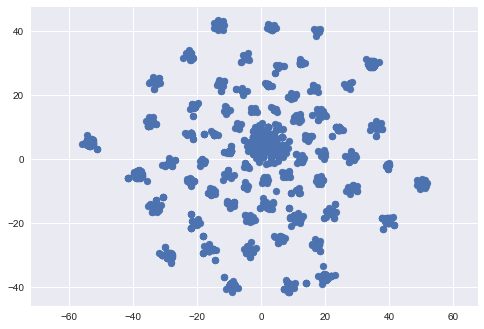

In [160]:
# DO NOT MODIFY THIS CELL -- ** BE SURE TO RUN THIS CELL **
song_title_tsne_2d = np.loadtxt('mystery_vectors.txt')
plt.scatter(song_title_tsne_2d[:, 0], song_title_tsne_2d[:, 1])
plt.axis('equal')

**Subpart i. [5 points]** From looking at the t-SNE 2D representation plot, do you think that this 2D data are well-modeled by a Gaussian mixture model? Briefly justify your answer.

**Your answer (do not write code for this subpart)**: Yes, a GMM can well-approximate the 2D data since the data look like a bunch of ellipses ofvarying sizes.

**Subpart ii. [5 points]** Let's try to figure out if the little clumps mean anything. As a sanity check, let's look at the points with t-SNE x-coordinate less than -45 (these points form the leftmost clump of points in the plot above). We've highlighted these points for you in the code cell below (which points are in the leftmost clump has already been computed for you below in the variable `leftmost_clump_mask`, which is a 1D numpy array of booleans, where the i-th entry being `True` means that it is in the leftmost clump, and `False` means that it is not in the leftmost clump):

(-61.2535903930664,
 57.141110229492185,
 -45.849595832824704,
 47.635083961486814)

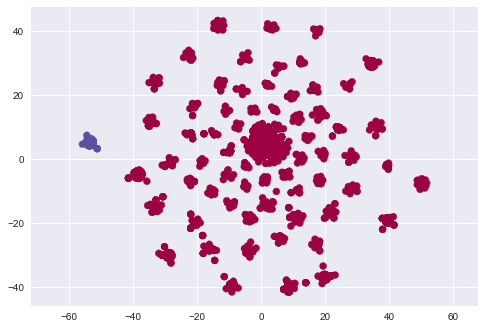

In [24]:
# DO NOT MODIFY THIS CELL -- ** BE SURE TO RUN THIS CELL **
song_title_tsne_2d = np.loadtxt('mystery_vectors.txt')
leftmost_clump_mask = (song_title_tsne_2d[:, 0] < -45)
plt.scatter(song_title_tsne_2d[:, 0], song_title_tsne_2d[:, 1],
            c=leftmost_clump_mask, cmap='Spectral')
plt.axis('equal')

It turns out that all the songs in the leftmost clump of points has a specific word in `vocabulary` show up. Which word is this? Be sure to briefly justify your answer with the help of some code. **Your Python code for this subpart should not only print out the word that answers the question but also makes it clear how you are finding this word.**

In [159]:
num_songs_in_leftmost_clump = len(song_title_feature_vectors[leftmost_clump_mask]) 
fraction_of_songs_mentioning_words = (song_title_feature_vectors[leftmost_clump_mask] >= 1).sum(axis=0) / num_songs_in_leftmost_clump
for word_idx in range(vocabulary.shape[0]):
    if fraction_of_songs_mentioning_words[word_idx] == 1:
        # fraction of 1 means all songs mention this word
        print(vocabulary[word_idx])

heart


In [156]:
# Another way to achieve the same result
print(vocabulary[np.all(song_title_feature_vectors[leftmost_clump_mask]>0, axis=0)])

['heart']


**Subpart iii. [10 points]** Let's investigate the big clump of points in the middle of the plot in subpart **ii**. We've already computed a boolean mask of which points belong to this big clump (loaded into the variable `big_clump_mask` in the code cell below).

(-61.2535903930664,
 57.141110229492185,
 -45.849595832824704,
 47.635083961486814)

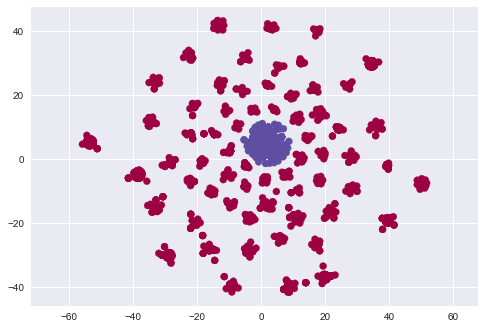

In [148]:
# DO NOT MODIFY THIS CELL -- ** BE SURE TO RUN THIS CELL **
big_clump_mask = np.loadtxt('mystery_mask.txt').astype(np.bool)
song_title_tsne_2d = np.loadtxt('mystery_vectors.txt')
plt.scatter(song_title_tsne_2d[:, 0], song_title_tsne_2d[:, 1],
            c=big_clump_mask, cmap='Spectral')
plt.axis('equal')

It turns out that the songs in the big clump all have "love" in the title. For this big clump, compute and display the 8 most common artists across songs that are in the big clump (for the display, it is fine to just print out who these artists are along with how many songs they have in the big clump; you do *not* need to plot a histogram/bar chart). **Your Python code for this subpart should print out 8 different pairings of artist/number of songs the artist has in the big clump -- do not worry about ties (so if two artists both have the same number of songs in the big clump, then you can list them in any order). Hint: You may find it helpful to use `Counter()`.**

In [96]:
big_clump_song_artists = song_artists[big_clump_mask] 
big_clump_artist_histogram = Counter()
for artist in big_clump_song_artists: 
    big_clump_artist_histogram[artist] += 1
for artist, count in sorted(big_clump_artist_histogram.items(), reverse=True, key=lambda x: x[1])[:8]: 
    print(artist,':', count)

whitney houston : 5
air supply : 4
the supremes : 3
stevie wonder : 3
the ojays : 3
bee gees : 3
taylor dayne : 3
next : 3


In [158]:
# Another way to achieve the same result
Counter(song_artists[big_clump_mask]).most_common()[:8]

[('whitney houston', 5),
 ('air supply', 4),
 ('the supremes', 3),
 ('stevie wonder', 3),
 ('the ojays', 3),
 ('bee gees', 3),
 ('taylor dayne', 3),
 ('next', 3)]